In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

This code is submitted as part of project 2 for the subject COMP90037 (Security Analytics) at the University of  Melbourne .
     
    -------------------------------------------
    COMP90037 Security Analytics - Project 2 
    Machine learning based Threat detection

    Author : Mohammed Ahsan Kollathodi 
    Student id: 1048942.
    

### Train 

In [2]:
pd_train = pd.read_csv('train_data_VT_A1.csv', sep=',')

In [3]:
pd_train.head()

,num_total_packets,total_bytes,src_bytes,packets_in_Sec,bytes_total_in_Sec,Source_Bytes_Sec,protocol,src_ip,src_port,direction,dst_ip,dst_port,state,dsttype_service
0,-0.011855,-0.011502,-0.006085,-0.009940,-0.057686,0.005116,8.0,46986.0,25937.0,6.0,42900.0,15542.0,69.0,0.0
1,0.097927,0.011758,0.018442,-0.164602,-0.127541,-0.045789,8.0,46986.0,35462.0,8.0,22164.0,58516.0,170.0,0.0
2,1.934192,0.468640,1.468779,-0.163396,-0.126357,-0.044450,9.0,47020.0,23255.0,8.0,23896.0,39465.0,16.0,0.0
3,-0.012677,-0.011578,-0.006190,-0.164696,-0.127552,-0.045794,2.0,46790.0,62779.0,6.0,80493.0,23018.0,325.0,4.0
4,12.183318,5.892219,15.613691,-0.160947,-0.120492,-0.038956,8.0,70245.0,48066.0,6.0,22770.0,38021.0,196.0,0.0


In [5]:
# SET THE CONTAMINATION EQUAL TO 0.01 
isln_frst = IsolationForest(contamination=0.01)

In [6]:
isln_frst.fit(pd_train)

IsolationForest(contamination=0.01)

### Test 

In [7]:
pd_test = pd.read_csv('test_data_VT_A1.csv', sep=',')

In [8]:
predict_test = isln_frst.predict(pd_test)
decision_functn = isln_frst.decision_function(pd_test)

In [9]:
pd_test['Anomalies'] = predict_test
pd_test['Score'] = decision_functn

In [10]:
pd_test['Anomalies'].value_counts() # The value -1 in the results would correspond to the number of anomalies. 

 1    347149
-1      1328
Name: Anomalies, dtype: int64

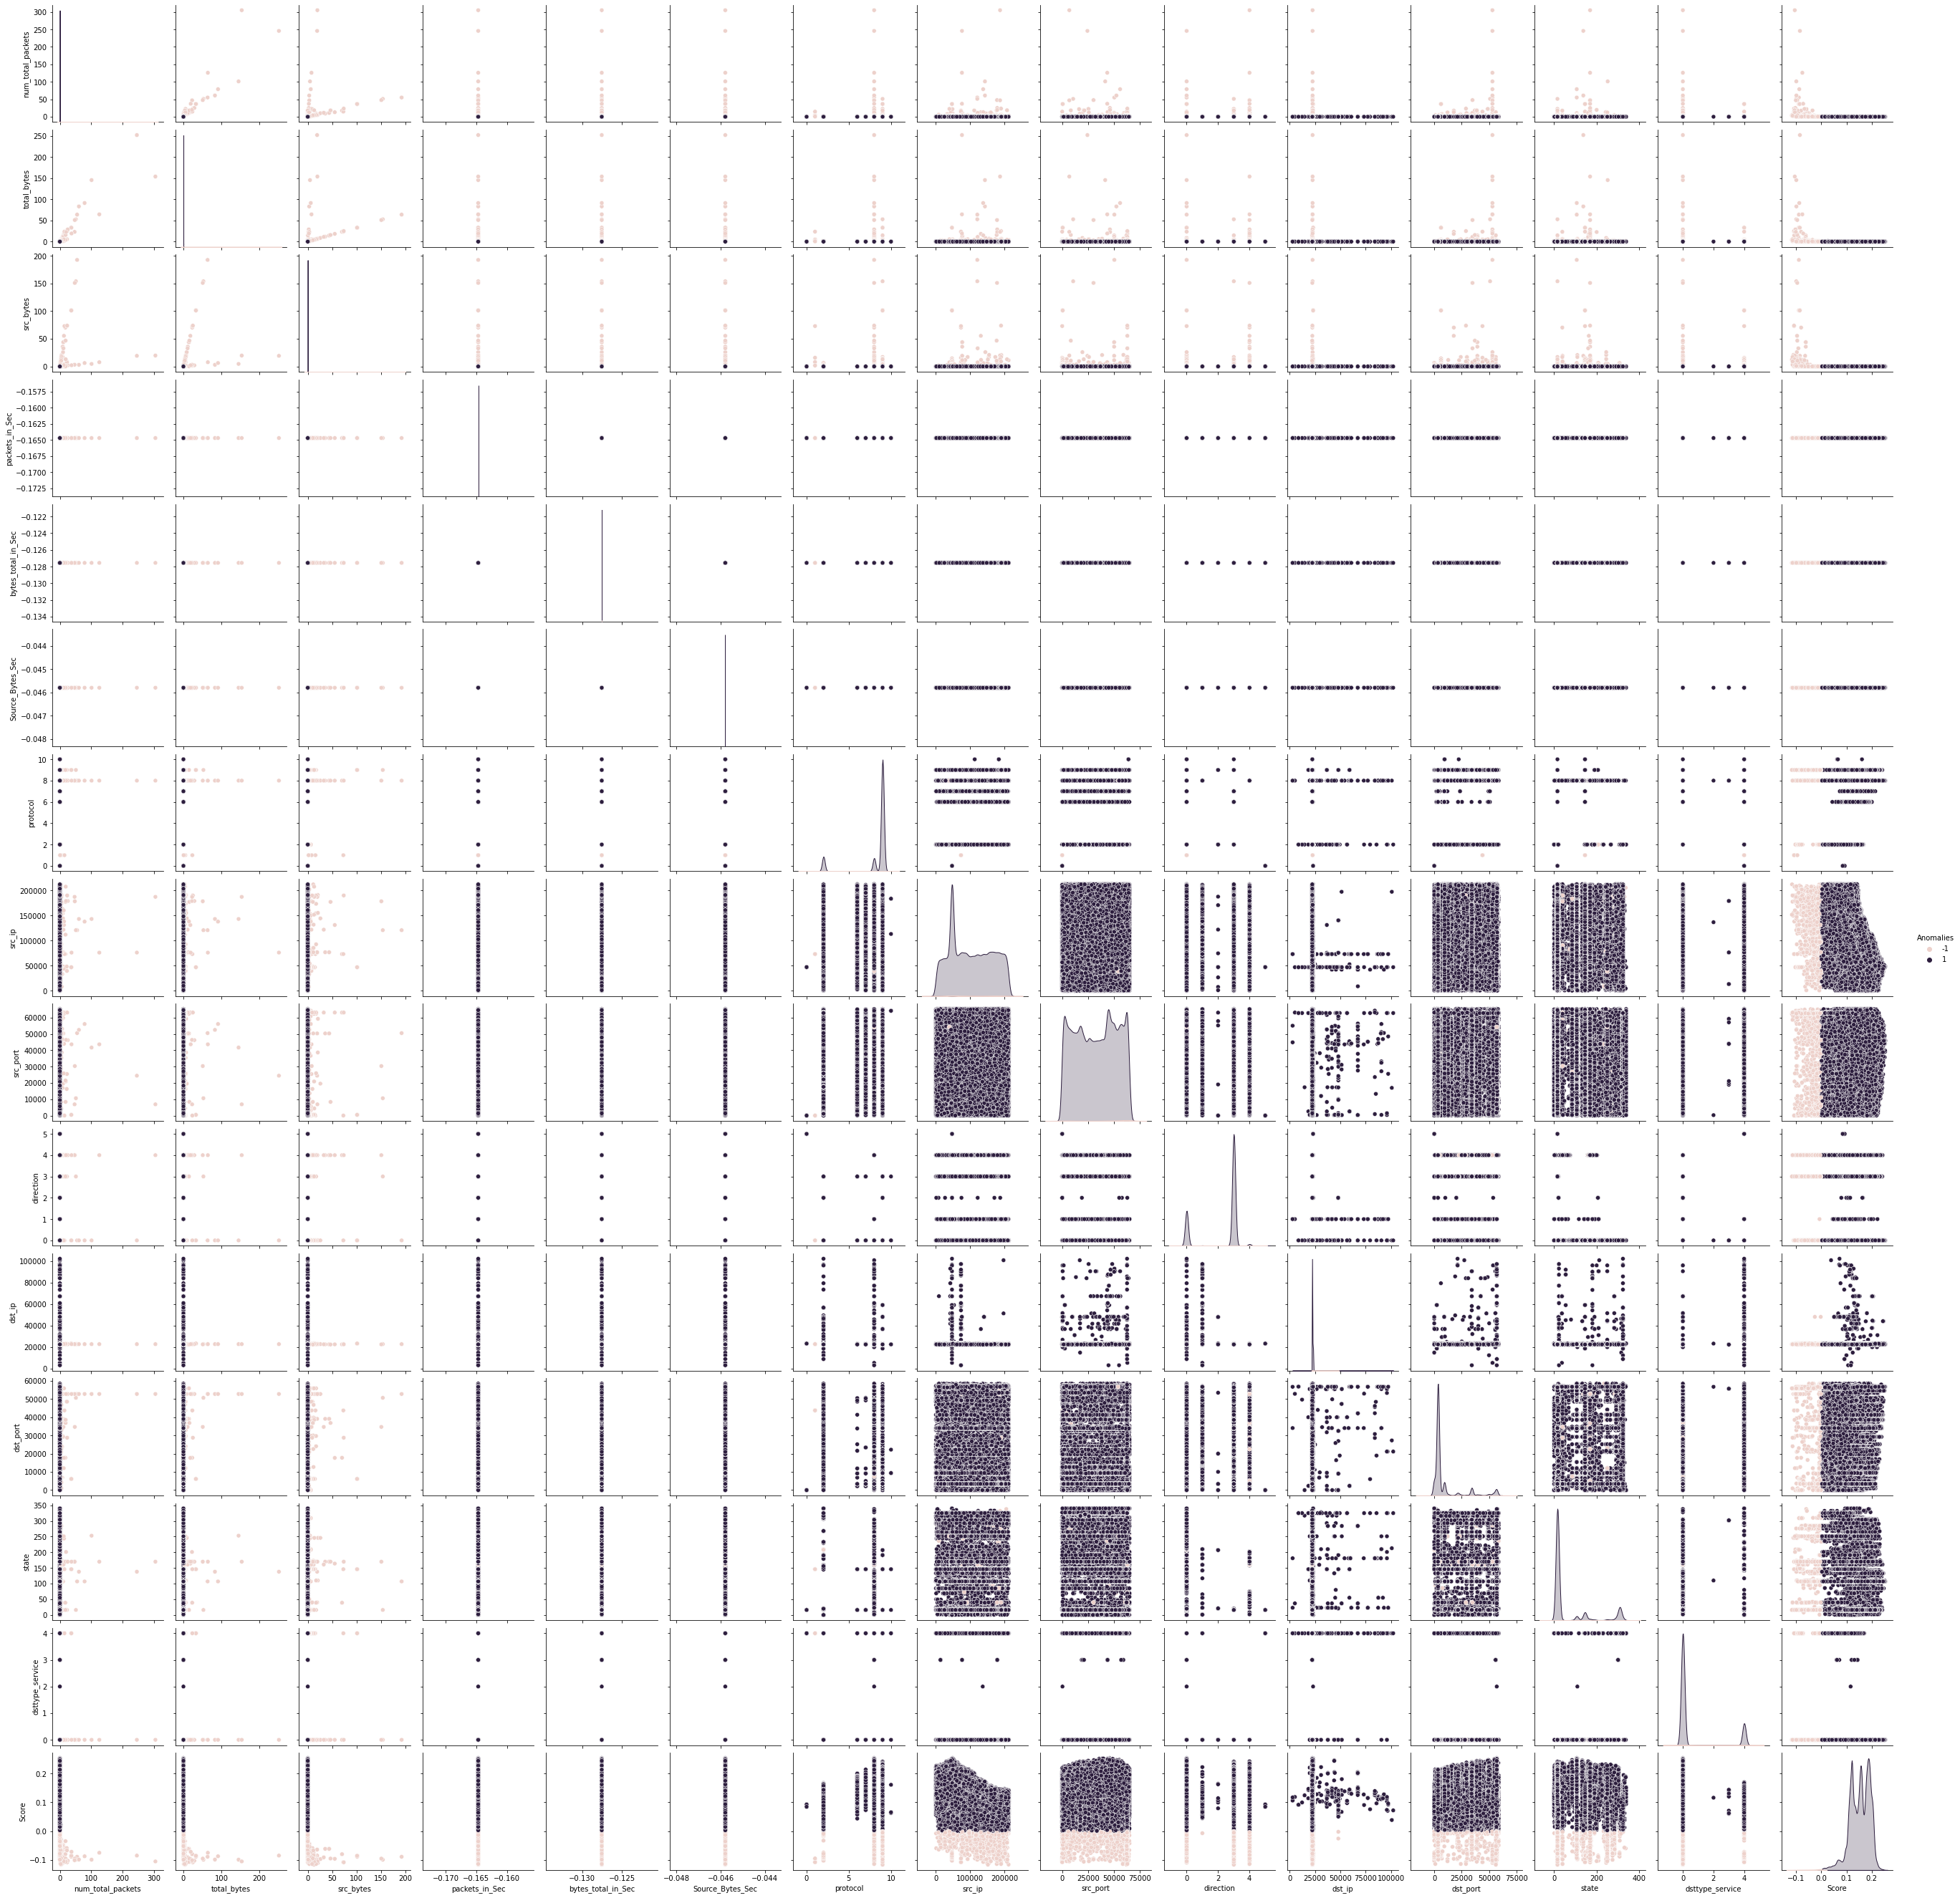

In [11]:
sns.pairplot(pd_test, hue = 'Anomalies')

In [14]:
Anomalies = pd_test.loc[pd_test['Anomalies'] == -1]

In [15]:
Anomalies.head()

,num_total_packets,total_bytes,src_bytes,packets_in_Sec,bytes_total_in_Sec,Source_Bytes_Sec,protocol,src_ip,src_port,direction,dst_ip,dst_port,state,dsttype_service,Anomalies,Score
4,4.870326,5.733420,0.364877,-0.164696,-0.127552,-0.045794,9.0,157870.0,35339.0,3.0,22461.0,32909.0,16.0,0.0,-1,-0.099364
6,3.140347,0.584694,1.626731,-0.164696,-0.127552,-0.045794,8.0,152115.0,45738.0,4.0,22928.0,21033.0,40.0,0.0,-1,-0.097971
8,17.466179,23.161543,70.354386,-0.164696,-0.127552,-0.045794,8.0,73103.0,63086.0,4.0,22461.0,17790.0,39.0,0.0,-1,-0.080512
9,0.855705,0.977295,2.987426,-0.164696,-0.127552,-0.045794,8.0,85375.0,63084.0,4.0,22797.0,29651.0,164.0,0.0,-1,-0.071880
10,0.970420,1.174261,0.064870,-0.164696,-0.127552,-0.045794,9.0,23639.0,23267.0,3.0,22461.0,32913.0,16.0,0.0,-1,-0.045716


In [16]:
test_original = pd.read_csv('testdata_cleaned.csv', sep=',')

In [17]:
Anomalies_feat_original = test_original[test_original.index.isin(Anomalies.index)]

In [18]:
Anomalies_feat_original = Anomalies_feat_original.merge(Anomalies[['Score']], left_index = True, right_index=True)

In [19]:
Anomalies_feat_original.head(10)

,timestamp,duration,protocol,src_ip,src_port,direction,dst_ip,dst_port,state,srctype_service,dsttype_service,num_total_packets,total_bytes,src_bytes,packets_in_Sec,bytes_total_in_Sec,Source_Bytes_Sec,Score
4,2021-08-15 18:24:13.357670,71.863629,udp,85.42.5.252,41912,<->,150.35.87.62,43085,CON,0.0,0.0,23753,24213065,507942,330.528814,336930.731094,7068.137364,-0.099364
6,2021-08-15 18:24:13.364316,637.394983,tcp,83.81.82.159,51287,->,150.35.89.27,31004,FPA_FPA,0.0,0.0,15338,2513221,2234665,24.063572,3942.956984,3505.934404,-0.097971
8,2021-08-15 18:24:13.370725,452.563303,tcp,195.224.109.129,80,->,150.35.87.62,2774,FPA_FA,0.0,0.0,85022,97665708,96281686,187.867641,215805.628216,212747.443893,-0.080512
9,2021-08-15 18:24:13.373200,123.595564,tcp,215.114.5.154,7999,->,150.35.89.138,3975,PA_FRA,0.0,0.0,4225,4167880,4096642,34.184075,33721.922154,33145.542246,-0.071880
10,2021-08-15 18:24:13.375851,118.226401,udp,117.81.17.163,31013,<->,150.35.87.62,43089,CON,0.0,0.0,4783,4998013,97413,40.456277,42274.931519,823.953020,-0.045716
13,2021-08-15 18:24:13.383286,3588.358461,tcp,150.35.85.104,57921,<->,150.35.89.91,3389,PA_PA,0.0,0.0,35172,13450974,1420967,9.801696,3748.503430,395.993604,-0.051317
20,2021-08-15 18:24:13.487998,530.735553,tcp,77.128.111.211,80,->,150.35.87.62,2766,PA_FRA,0.0,0.0,63071,77078226,75834337,118.836960,145229.060872,142885.353178,-0.096597
22,2021-08-15 18:24:13.547207,91.162003,udp,61.185.5.9,16289,<->,150.35.87.62,43087,CON,0.0,0.0,1181,1194306,27397,12.954959,13100.918786,300.530912,-0.044040
30,2021-08-15 18:24:13.676266,3605.900624,tcp,84.23.51.54,80,->,150.35.87.62,39838,PA_PA,0.0,0.0,44357,24621261,23530475,12.301226,6828.047571,6525.547277,-0.101469
35,2021-08-15 18:24:13.718224,210.582199,tcp,198.27.235.167,80,->,150.35.87.167,34589,FPA_FA,0.0,0.0,3569,3600633,3528516,16.948251,17098.468055,16756.003211,-0.067224


In [20]:
import numpy as np
Anomalies_feat_original.loc[Anomalies_feat_original['packets_in_Sec'] != np.inf].describe().apply(lambda s: s.apply(lambda x: format(x, 'g')))




,duration,src_port,dst_port,srctype_service,dsttype_service,num_total_packets,total_bytes,src_bytes,packets_in_Sec,bytes_total_in_Sec,Source_Bytes_Sec,Score
count,1328,1328,1328,1326,937,1328,1328,1328,1328,1328,1328,1328
mean,1141.2,20244.4,2.03724e+06,0,0,8000.64,5.89523e+06,2.25822e+06,98.2631,103833,42120.9,-0.0320045
std,1297.32,23064.4,3.30223e+07,0,0,60966.4,4.39806e+07,1.44092e+07,607.167,832022,761084,0.0304494
min,0.000950907,0,0,0,0,16,2748,0,0.00732315,1.26888,0,-0.117059
25%,31.4115,15,80,0,0,123.5,44856.5,36206.8,0.0850048,42.1469,39.4105,-0.0531304
50%,887.44,7516,443,0,0,750,208932,48382,1.96845,558.484,116.62,-0.0194966
75%,1459.52,47770.8,7602,0,0,2295,1.60904e+06,144103,52.7265,47617.1,3897.42,-0.00681881
max,3636.18,65525,5.39024e+08,0,0,1.4842e+06,1.06155e+09,2.638e+08,16826,2.69364e+07,2.70805e+07,-0.000107884


In [21]:
Anomalies_feat_original['src_ip'].nunique()

791

In [22]:
Anomalies_feat_original.to_csv('test_iForest_0.01_VT_orig_feat_A1.csv', sep=',')